In [67]:
import casatools
import numpy as np 
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format = 'retina'

# initialize the relevant CASA tools
tb = casatools.table()
ms = casatools.ms()

In [4]:
filename = "calibrator_data_spw25_FDM.ms"

In [11]:
tb.open(filename)
colnames = tb.colnames()
spw_id = tb.getcol("DATA_DESC_ID")  # array of int with shape [npol, nchan, nvis]
field_id = tb.getcol("FIELD_ID")  # array of int with shape [npol, nchan, nvis]
ant1 = tb.getcol("ANTENNA1")  # array of int with shape [nvis]
ant2 = tb.getcol("ANTENNA2")  # array of int with shape [nvis]
uvw = tb.getcol("UVW")  # array of float64 with shape [3, nvis]
weight = tb.getcol("WEIGHT")  # array of float64 with shape [npol, nvis]
flag = tb.getcol("FLAG")  # array of bool with shape [npol, nchan, nvis]
data = tb.getcol("DATA")  # array of complex128 with shape [npol, nchan, nvis]
tb.close()

True

In [21]:
uu, vv, ww = uvw
qq = np.sqrt(uu**2 + vv**2)

In [26]:
data_XX, data_YY = data
weight_XX, weight_YY = weight

In [37]:
def weight_to_sigma(weight):
    return np.sqrt(1/weight)

In [29]:
nchan = data_XX.shape[0]

## Plot all visibilities as a function of baseline

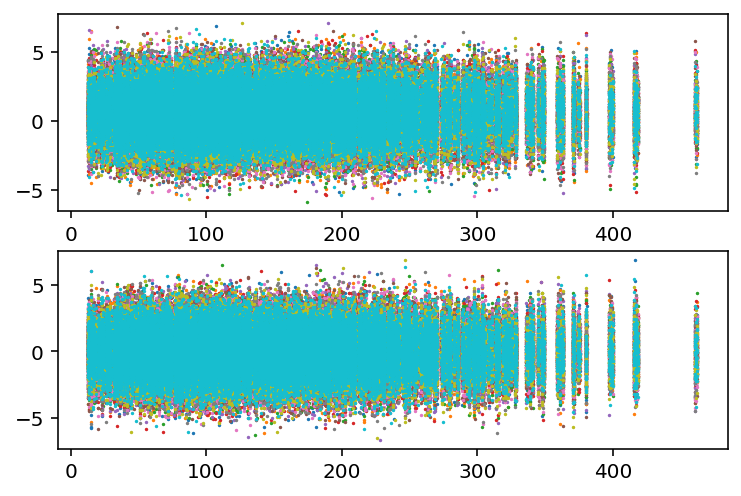

In [68]:
fig, ax = plt.subplots(nrows=2)
for i in range(10):
    ax[0].scatter(qq, data_XX.real[i], s=0.5)
    ax[1].scatter(qq, data_XX.imag[i], s=0.5)

For at least these first 10 channels, we have confirmed that there is no variance of visibility as function of radial baseline, indicating that the source is unresolved. Moreover, the imaginary values appear to be zero, indicating the source is located at phase center.

## Calculate the mean real and imag for each channel averaged across baselines

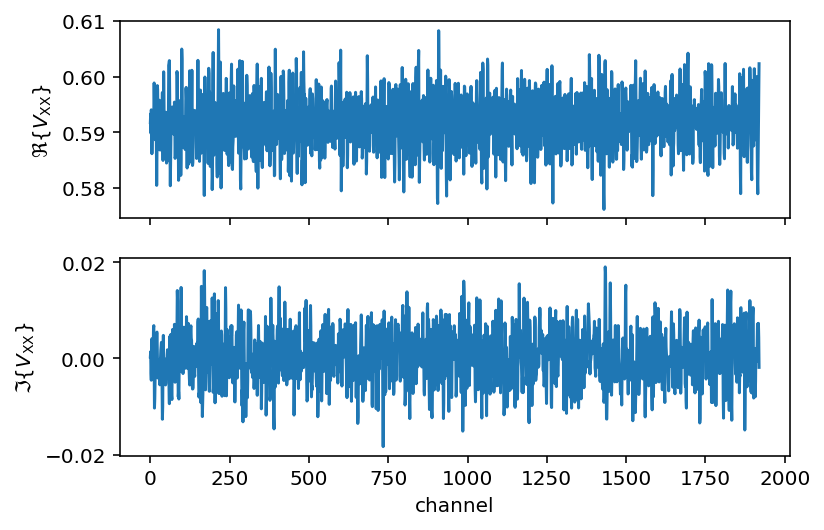

In [69]:
chans = np.arange(nchan)
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot(chans, np.mean(data_XX.real, axis=1))
ax[0].set_ylabel(r"$\Re \{V_\mathrm{XX} \}$")
ax[1].plot(chans, np.mean(data_XX.imag, axis=1))
ax[1].set_ylabel(r"$\Im \{V_\mathrm{XX} \}$")
ax[1].set_xlabel("channel");

In [63]:
mean_XX_real = np.mean(data_XX.real)
mean_XX_imag = np.mean(data_XX.imag)
print(mean_XX_real, mean_XX_imag)

0.5918518520368867 0.00030855101413364993


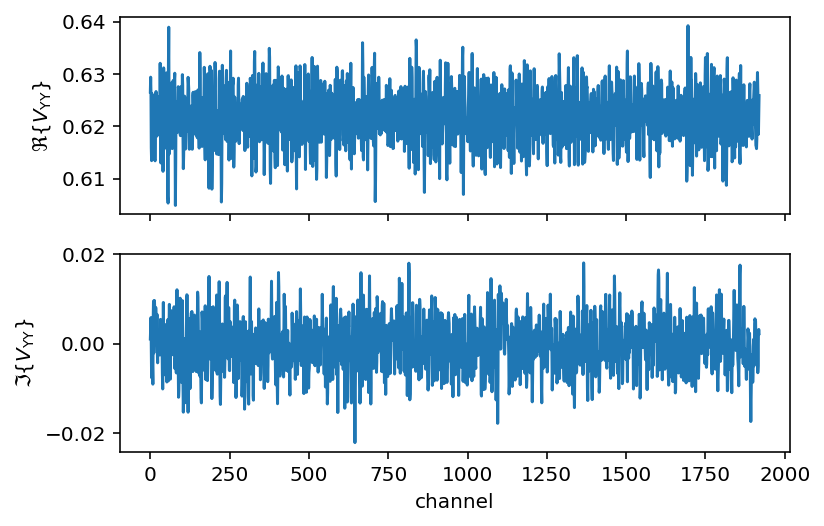

In [70]:
chans = np.arange(nchan)
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot(chans, np.mean(data_YY.real, axis=1))
ax[0].set_ylabel(r"$\Re \{V_\mathrm{YY} \}$")
ax[1].plot(chans, np.mean(data_YY.imag, axis=1))
ax[1].set_ylabel(r"$\Im \{V_\mathrm{YY} \}$")
ax[1].set_xlabel("channel");

In [64]:
mean_YY_real = np.mean(data_YY.real)
mean_YY_imag = np.mean(data_YY.imag)
print(mean_YY_real, mean_YY_imag)

0.6220685209935962 -0.0002577346515331778


We have confirmed that there is no strong spectral slope to the channels in either of the polarizations. We have also confirmed that the average (over all baselines) real value is about 0.6 Jy, though there is some variation between polarizations. We have confirmed that the average (over all baselines) imaginary value is approximately 0.0, which is good.

## What do the distribution of weights look like?

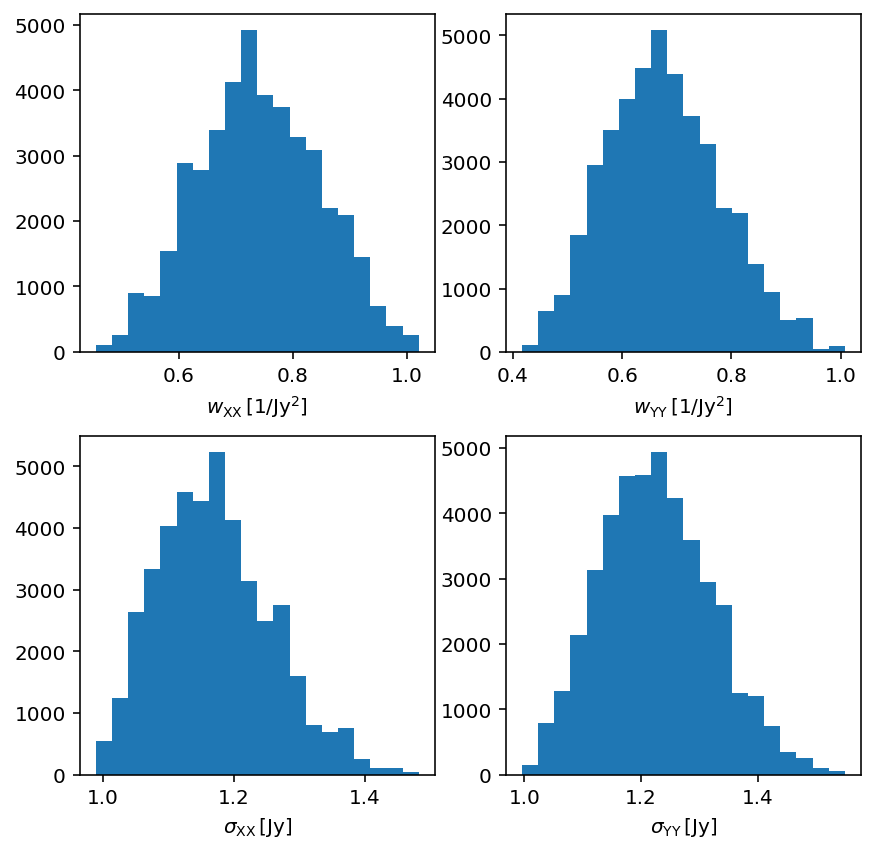

In [71]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(7,7))
ax[0,0].hist(weight_XX, bins=20)
ax[0,0].set_xlabel(r"$w_\mathrm{XX}\,[1/\mathrm{Jy}^2]$")
ax[0,1].hist(weight_YY, bins=20)
ax[0,1].set_xlabel(r"$w_\mathrm{YY}\,[1/\mathrm{Jy}^2]$")

ax[1,0].hist(weight_to_sigma(weight_XX), bins=20)
ax[1,0].set_xlabel(r"$\sigma_\mathrm{XX}\,[\mathrm{Jy}]$")
ax[1,1].hist(weight_to_sigma(weight_YY), bins=20)
ax[1,1].set_xlabel(r"$\sigma_\mathrm{YY}\,[\mathrm{Jy}]$");
fig.subplots_adjust(hspace=0.25)

## What does the scatter of real and imaginary visibility values look like

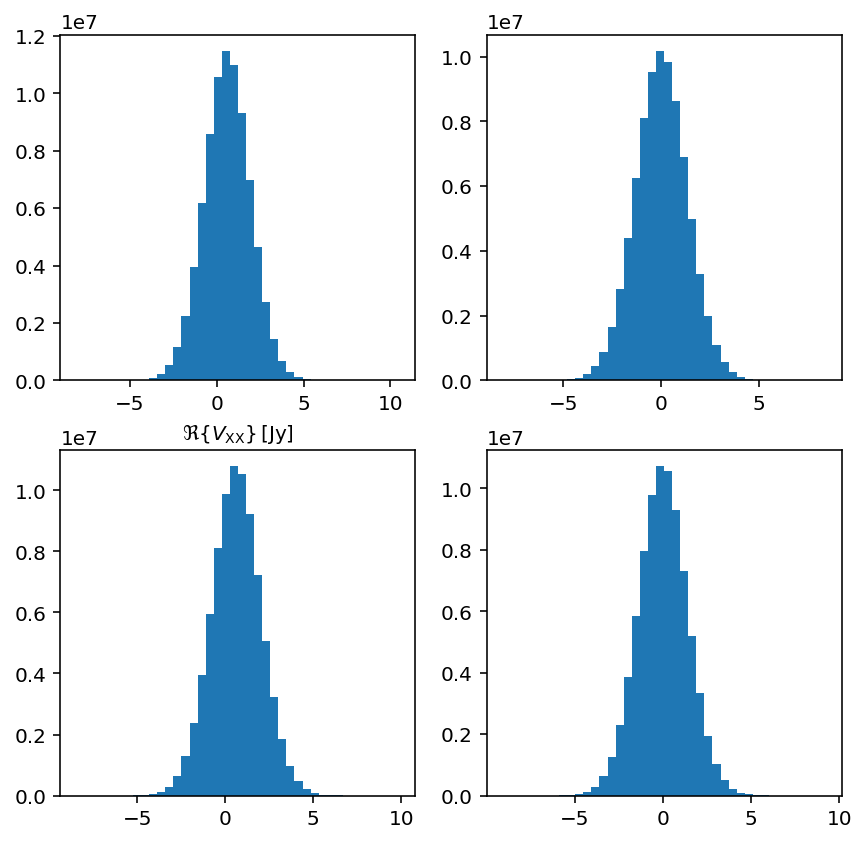

In [72]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(7,7))
ax[0,0].hist(data_XX.real.flatten(), bins=40)
ax[0,0].set_xlabel(r"$\Re \{ V_\mathrm{XX} \}\,[\mathrm{Jy}]$")
ax[0,1].hist(data_XX.imag.flatten(), bins=40)
# ax[0,1].set_xlabel(r"$w_\mathrm{YY}\,[1/\mathrm{Jy}^2]$")

ax[1,0].hist(data_YY.real.flatten(), bins=40)
# ax[1,0].set_xlabel(r"$\sigma_\mathrm{XX}\,[\mathrm{Jy}]$")
ax[1,1].hist(data_YY.imag.flatten(), bins=40);

# ax[1,1].set_xlabel(r"$\sigma_\mathrm{YY}\,[\mathrm{Jy}]$");
# fig.subplots_adjust(hspace=0.25)

In [85]:
def gaussian(x):
    """
    sigma = 1
    """
    return 1/np.sqrt(2 * np.pi) * np.exp(-0.5 * x**2)

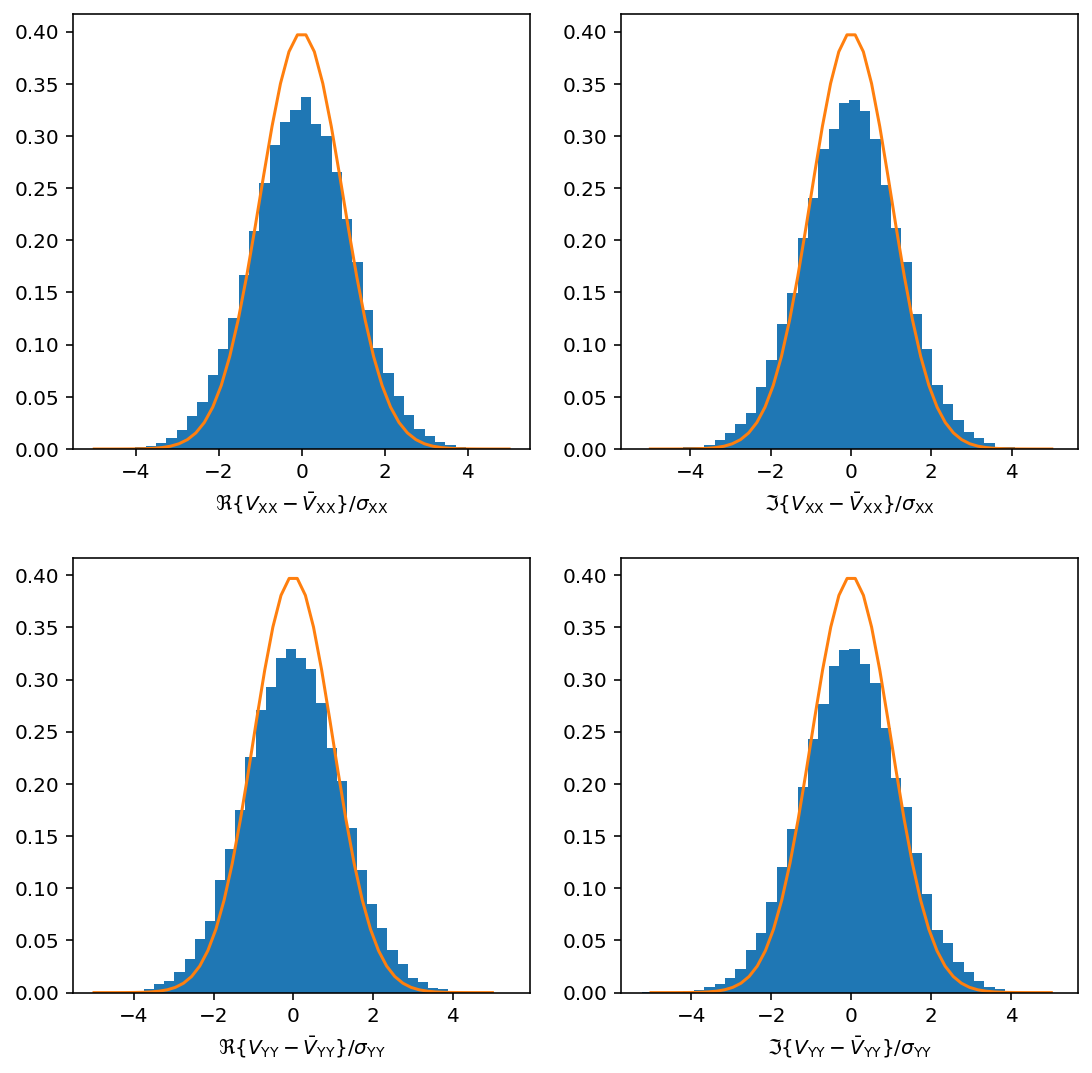

In [86]:
xs = np.linspace(-5,5)
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9,9))
ax[0,0].hist((data_XX.real[0] - mean_XX_real)/weight_to_sigma(weight_XX), bins=40, density=True)
ax[0,0].set_xlabel(r"$\Re \{ V_\mathrm{XX} - \bar{V}_\mathrm{XX} \} / \sigma_\mathrm{XX}$")
ax[0,1].hist((data_XX.imag[0] - mean_XX_imag)/weight_to_sigma(weight_XX), bins=40, density=True)
ax[0,1].set_xlabel(r"$\Im \{ V_\mathrm{XX} - \bar{V}_\mathrm{XX} \} / \sigma_\mathrm{XX}$")

ax[1,0].hist((data_YY.real[0] - mean_YY_real)/weight_to_sigma(weight_YY), bins=40, density=True)
ax[1,0].set_xlabel(r"$\Re \{ V_\mathrm{YY} - \bar{V}_\mathrm{YY} \} / \sigma_\mathrm{YY}$")
ax[1,1].hist((data_YY.imag[0] - mean_YY_imag)/weight_to_sigma(weight_YY), bins=40, density=True)
ax[1,1].set_xlabel(r"$\Im \{ V_\mathrm{YY} - \bar{V}_\mathrm{YY} \} / \sigma_\mathrm{YY}$");

for a in ax.flatten():
    a.plot(xs, gaussian(xs))


fig.subplots_adjust(hspace=0.25)